## Air Pollution Study Using EPA Data

The study below looks at air quality in the U.S. between 2004 and 2014 using selected data from the EPA, available at http://aqsdr1.epa.gov/aqsweb/aqstmp/airdata/download_files.html. Specifically, we look at PM 2.5 data, which refers to particulate matter less than or equal to 2.5 microns in size, also called fine particle pollution.

The goal is to see how pollution levels have changed during the period of interest, both nationwide and for individual states.


In [1]:
import numpy as np
import pandas as pd

# For 2004, starting at row 150656, the State Code switches from an integer to 'CC', 
# indicating Canada, so we need to skip those. For both years, we'll parse the
# dates, which are at column 11.
skip = range(150656, 150772)
data2004 = pd.read_csv('Data/daily_88101_2004.csv', skiprows=skip, parse_dates=[11])
data2014 = pd.read_csv('Data/daily_88101_2014.csv', parse_dates=[11])

In [2]:
# Create subsets of the data, with just the columns we care about.
d2004 = data2004.loc[:, ['State Code','County Code','Site Num','Latitude','Longitude',\
                         'Date Local','AQI','State Name','County Name', 'City Name']]
d2014 = data2014.loc[:, ['State Code','County Code','Site Num','Latitude','Longitude',\
                         'Date Local','AQI','State Name','County Name', 'City Name']]

The feature we are most interested in is the Air Quality Index (AQI), recorded as an integer that ranges from 0 to greater than 300, measured in micrograms per cubic meter. Here is how the EPA defines the air quality for ranges of AQI:
- 0–50: "Good"
- 51–100: "Moderate"
- 101–150: "Unhealthy for Sensitive Groups"
- 151–200: "Unhealthy"
- 201–300: "Very Unhealthy"
- Above 300: "Hazardous"


In [3]:
# Create a summary dataframe of the AQI data for the two years
AQI_summary = pd.DataFrame([d2004.describe().loc[['min', 'max', 'mean'], 'AQI'], 
                    d2014.describe().loc[['min', 'max', 'mean'], 'AQI']], ['2004', '2014'])
AQI_summary

,min,max,mean
2004,0,503,44.203246
2014,0,240,34.231220


Just based on this cursory summary, it looks like there's been improvement over the last ten years, i.e., a reduction in the amount of PM 2.5 measured. But let's look deeper and make some graphs.

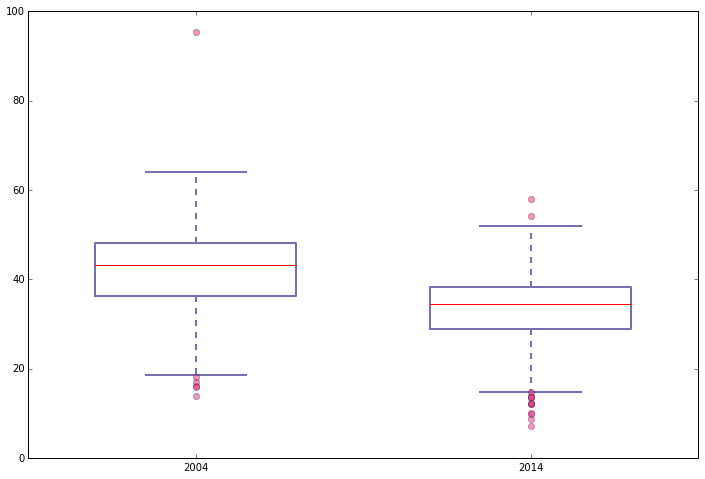

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Rather than use all the points, we'll group the data by state and county, 
# then get the means.
AQI_mean_2004 = d2004.groupby(['State Code', 'County Code']).aggregate(np.mean)
AQI_mean_2014 = d2014.groupby(['State Code', 'County Code']).aggregate(np.mean)

AQI_2004 = np.array(AQI_mean_2004[['AQI']])
AQI_2014 = np.array(AQI_mean_2014[['AQI']])

# Create a figure instance
fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(111)

# Create the boxplot
boxprops = dict(linestyle='-', linewidth=2, color='#7570b3')
medianprops = dict(linestyle='-.', color='#b2df8a', linewidth=2)
capprops = dict(color='#7570b3', linewidth=2)
flierprops = dict(marker='o', color='#e7298a', alpha=0.5)
whiskerprops = dict(color='#7570b3', linewidth=2)
meanpointprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')

bp = ax.boxplot([AQI_2004, AQI_2014], widths=.6,
               boxprops=boxprops, flierprops=flierprops, 
               meanprops=meanpointprops, capprops=capprops,
               whiskerprops=whiskerprops)
ax.set_xticklabels(['2004', '2014'])

plt.show()

With the aggregated data, it looks like the pollutant levels have indeed gone down since 2004. However, there are two things to keep in mind:
- Pollutant levels vary over the seasons, and tend to be higher in the winter and late summer.
- Some states may have improved more than others.

Let's first look at how levels of PM 2.5 vary over the course of the year, for both 2004 and 2014.

In [5]:
# First, group by month and get the means.
grouped2004 = d2004.groupby([pd.DatetimeIndex(d2004['Date Local']).month]).aggregate(np.mean)
grouped2014 = d2014.groupby([pd.DatetimeIndex(d2014['Date Local']).month]).aggregate(np.mean)

# Create numpy arrays of just the AQI data
AQI_2004 = np.array(grouped2004['AQI'])
AQI_2014 = np.array(grouped2014['AQI'])


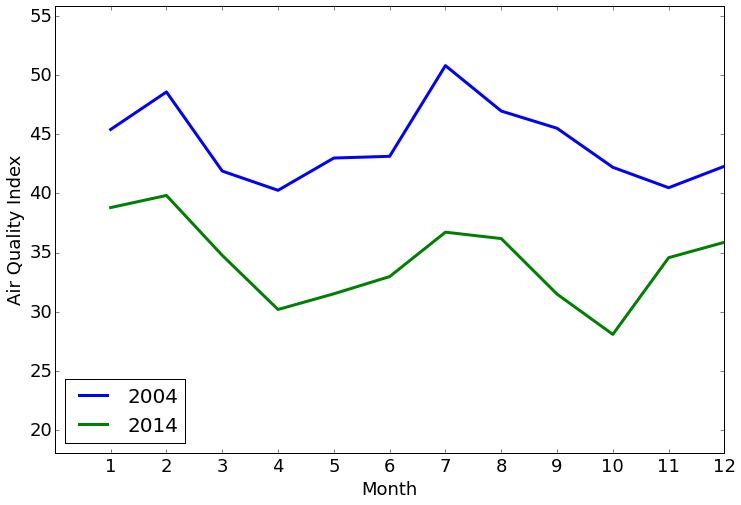

In [6]:
max_y = max(max(grouped2014['AQI']), max(grouped2004['AQI']))
min_y = min(min(grouped2014['AQI']), min(grouped2004['AQI']))

x = np.arange(1,13)

fig = plt.figure(2, figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
plt.rc('font', weight='medium', size=18)
ax.set_ylim([min_y-10, max_y+5])
ax.set_xlabel('Month')
ax.set_ylabel('Air Quality Index')
ax.plot(x, AQI_2004, linewidth = 3, label='2004')
ax.plot(x, AQI_2014, linewidth = 3, label='2014')
plt.xticks(range(1, 13), np.arange(1, 13))
ax.legend(loc='lower left', fontsize=20)
plt.show()


Great! We seem to see improvement in each month when we compare 2014 with 2004. Next, we want to see how the individual states have done. Note that this includes Washington DC, Puerto Rico, and the U.S. Virgin Islands.

In [7]:
grouped2004 = d2004.groupby(d2004['State Code']).aggregate(np.mean)
grouped2014 = d2014.groupby(d2014['State Code']).aggregate(np.mean)

# Create numpy arrays of just the AQI data
AQI_2004 = np.array(grouped2004['AQI'])
AQI_2014 = np.array(grouped2014['AQI'])

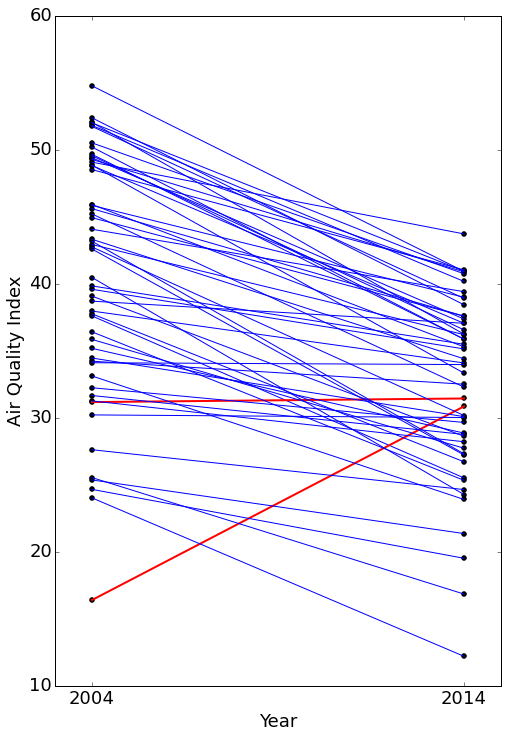

In [8]:
max_y = max(max(grouped2014['AQI']), max(grouped2004['AQI']))
min_y = min(min(grouped2014['AQI']), min(grouped2004['AQI']))

# Create single data frame
AQI = pd.DataFrame([pd.Series(AQI_2004), pd.Series(AQI_2014)], ['2004','2014'])
AQI = AQI.T

fig = plt.figure(3, figsize=(8, 12))
ax = fig.add_subplot(1,1,1)
plt.rc('font', weight='medium', size=18)
ax.set_ylim([10, 60])
ax.set_xlim([2003, 2015])

# Plot each line, where a thick red line indicates an increase in AQI
for i, row in AQI.iterrows():
    if row['2014'] > row['2004']:
        ax.plot(AQI.columns, row, color='red', linewidth=2)
    else: 
        ax.plot(AQI.columns, row, color='blue', linewidth=1)
    plt.scatter([2004, 2014], row, color='black')

plt.xticks([2004,2014], ['2004','2014'])
ax.set_xlabel('Year')
ax.set_ylabel('Air Quality Index')

Two of the states or territories showed an increase in the Air Quality Index. Let's see who these miscreants are.

In [9]:
# First get a boolean array showing True for each state with higher AQI,
# then use that to get a list of the state codes (the index) where value is True.
higherAQI = grouped2014['AQI'] > grouped2004['AQI']
codes = higherAQI.index[higherAQI].tolist()

# Create new data frame grouped by State Name and including the State Code,
# so we can find the state name based on the state code in the 'codes' list.
grouped = data2004.loc[:,['State Code', 'State Name']].groupby('State Name').mean()
print '\n Here are the states with increased levels of AQI since 2004:'
print '\t', ', '.join(grouped[grouped['State Code'].isin(codes)].index.tolist())


 Here are the states with increased levels of AQI since 2004:
	Arizona, Hawaii


## Graph of AQI Values for 2014

Now we'll create a graphical representation of what the Air Quality Index is for each state as of 2014. For fun, let's make a bubble graph, where the center of each bubble is about the where the centers of the various monitoring stations are for each state. That is, we use the mean of the latitudes and longitudes of the monitoring stations to position each state's bubble. Also, to keep the graph more compact, we'll just focus on the continental U.S., leaving off Alaska, Hawaii, Virgin Islands and Puerto Rico.

In [10]:
# Remove Alaska, Hawaii, V.I. and Puerto Rico, then group by the state name.
d2014_2 = d2014[(d2014['State Code'] < 57) & 
                (d2014['State Code'] !=2) & 
                (d2014['State Code'] !=15)]

grouped2014_2 = d2014_2.groupby('State Name').mean()

# Add state abbreviations so we can used them in the bubble graph.
states = pd.Series(["AL", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"], 
                   index=grouped2014_2.index)
grouped2014_2['Abbreviations'] = states

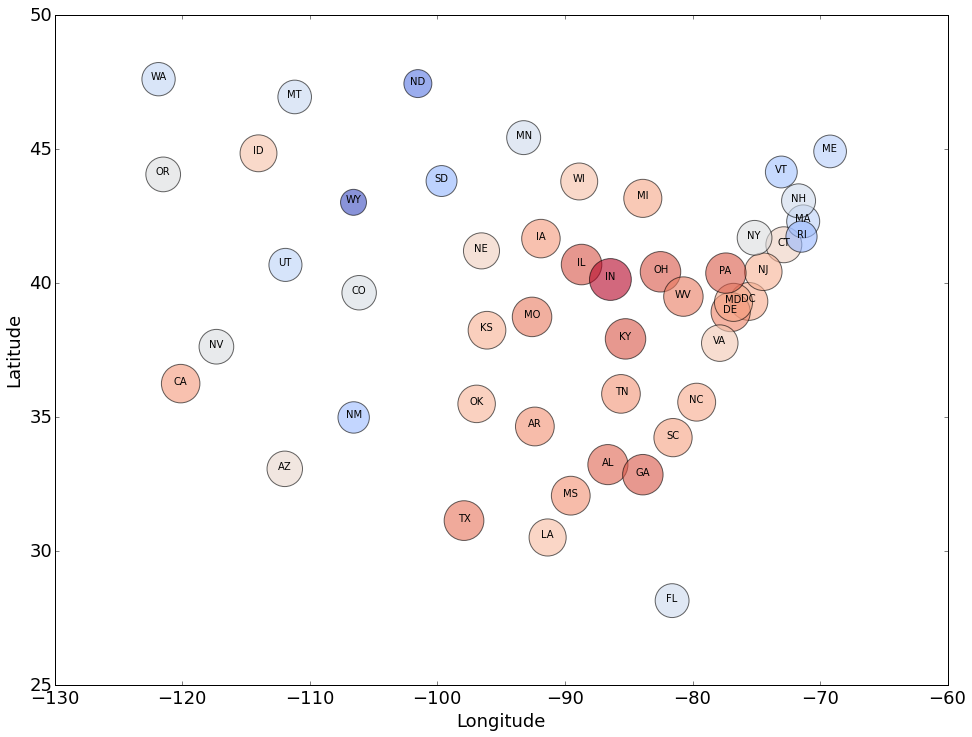

In [11]:
# 2014 bubble plot based on location and AQI levels
fig = plt.figure(figsize=(16, 12))        
ax = fig.add_subplot(111)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Get a scaled version of the AQI so we can use it to color the bubbles
scaled_AQI = (grouped2014_2['AQI'] - grouped2014_2['AQI'].min())/grouped2014_2['AQI'].ptp()

# Graph the bubbles, scaling the sizes based on AQI
scatter = ax.scatter(
    grouped2014_2['Longitude'], 
    grouped2014_2['Latitude'], 
    
    s = 40*grouped2014_2['AQI'],
    linewidths = 1, 
    edgecolor = 'k',
    c = scaled_AQI, 
    cmap = plt.cm.coolwarm,
    alpha = 0.6
)

# Add the labels of the state abbreviations to each bubble
for i, row in grouped2014_2.iterrows():
    plt.text(
        row['Longitude'],
        row['Latitude'],
        row['Abbreviations'], 
        size=10,
        horizontalalignment='center'
    )
plt.show()

Okay, perhaps this is not the best representation of the data. Things get a little muddled around Washington DC, but what else is new?

So let's try a different mapping style.

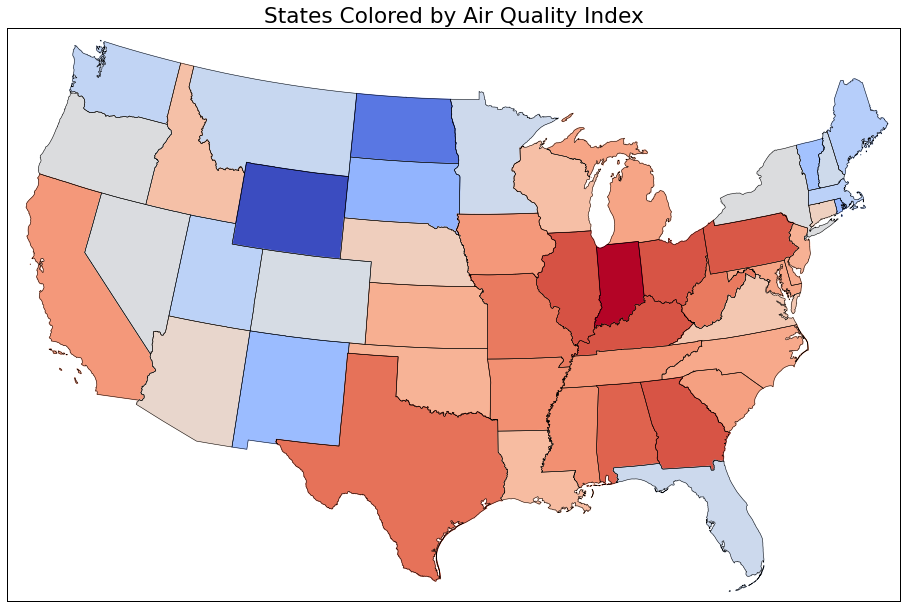

In [46]:
# With a little help from the Basemap examples at 
# https://github.com/matplotlib/basemap/tree/master/examples

from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49,
            projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

# Draw state boundaries.
# Data from https://github.com/matplotlib/basemap/tree/master/examples
# Need to get .dbf, .shp, and .shx files
fig = plt.figure(figsize=(16, 12))
shp_info = m.readshapefile('Data/st99_d00', 'states', drawbounds=True)

# Get colors for each state based on AQI.
colors={}
statenames=[]
cmap = plt.cm.coolwarm 
vmin = min(grouped2014_2['AQI']); vmax = max(grouped2014_2['AQI']) # set range.

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # Skip areas we don't want.
    if statename not in ['Alaska','Hawaii','District of Columbia','Puerto Rico']:
        aqi = grouped2014_2['AQI'].loc[statename]  
        # Calling colormap with value between 0 and 1 returns rgba value.
        colors[statename] = cmap((aqi-vmin)/(vmax-vmin))[:3]
    statenames.append(statename)
    
# Cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # Skip areas we don't want.
    if statenames[nshape] not in ['Alaska','Hawaii','District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)

plt.title('States Colored by Air Quality Index')
plt.show()


The higher AQI values (i.e., worse) are in red, while the lower values (better) are in blue.